In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('CVD_cleaned.csv')

In [3]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,m,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [4]:
df.shape

(308854, 19)

In [5]:
#In the given dataset there are total 308854 rows and 19 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [7]:
#12 attributes with object data type
#5 attributes with integer data type
#2 attributes with float data type

In [8]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [9]:
df.describe(include='O')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,7,5,2,2,2,2,2,4,2,5,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160186,33434,183590


Identifying Nulls

In [10]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [11]:
#In our dataset there are no null values.Therefore treatment of null values is not required.

Treating noise in the categorical columns

In [12]:
df['General_Health'].unique()

array(['Poo', 'Very Good', 'Poor', 'Good', 'Fair', 'Excellent', 'poo'],
      dtype=object)

In [13]:
df['General_Health']=df['General_Health'].replace({'poo':'Poor','Poo':'Poor'})

In [14]:
df['Diabetes'].value_counts()

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [15]:
 df['Diabetes']=df['Diabetes'].replace({'No, pre-diabetes or borderline diabetes':'No','Yes, but female told only during pregnancy':'No'})

In [16]:
 df['Sex'].unique()

array(['Female', 'Male', 'F', 'M', 'm'], dtype=object)

In [17]:
 df['Sex']=df['Sex'].replace({'F':'Female','M':'Male','m':'Male'})

EDA

1.Univariate Aanalysis

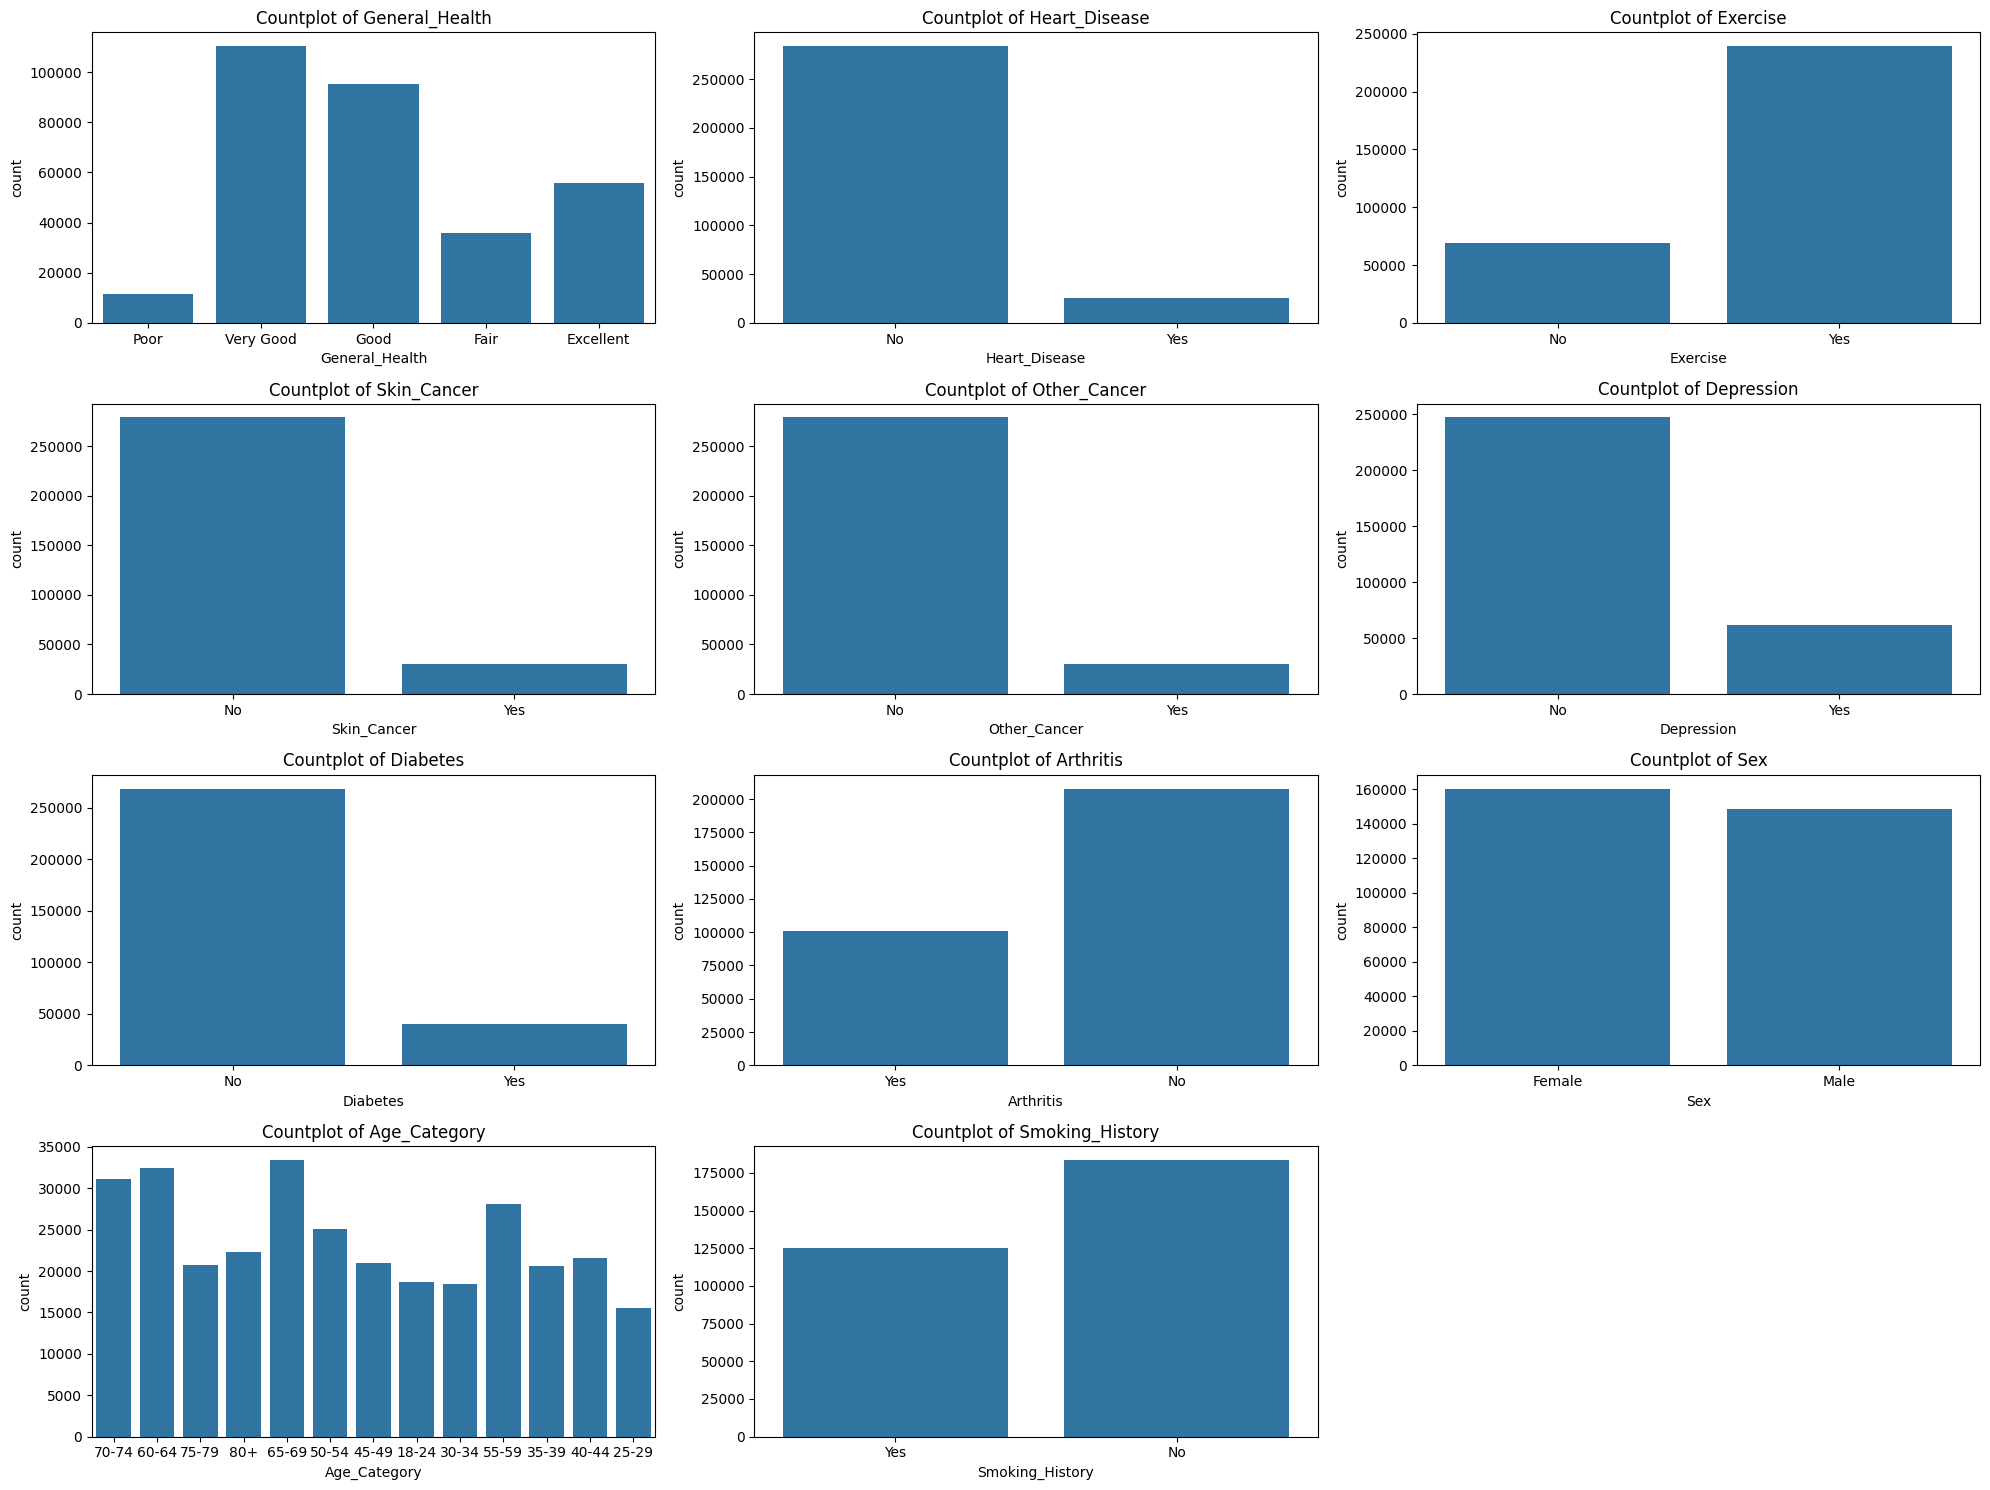

In [18]:
categorical_columns=['General_Health','Heart_Disease','Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']
rows = 4
cols = 3
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns,1):
    plt.subplot(rows,cols, i)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


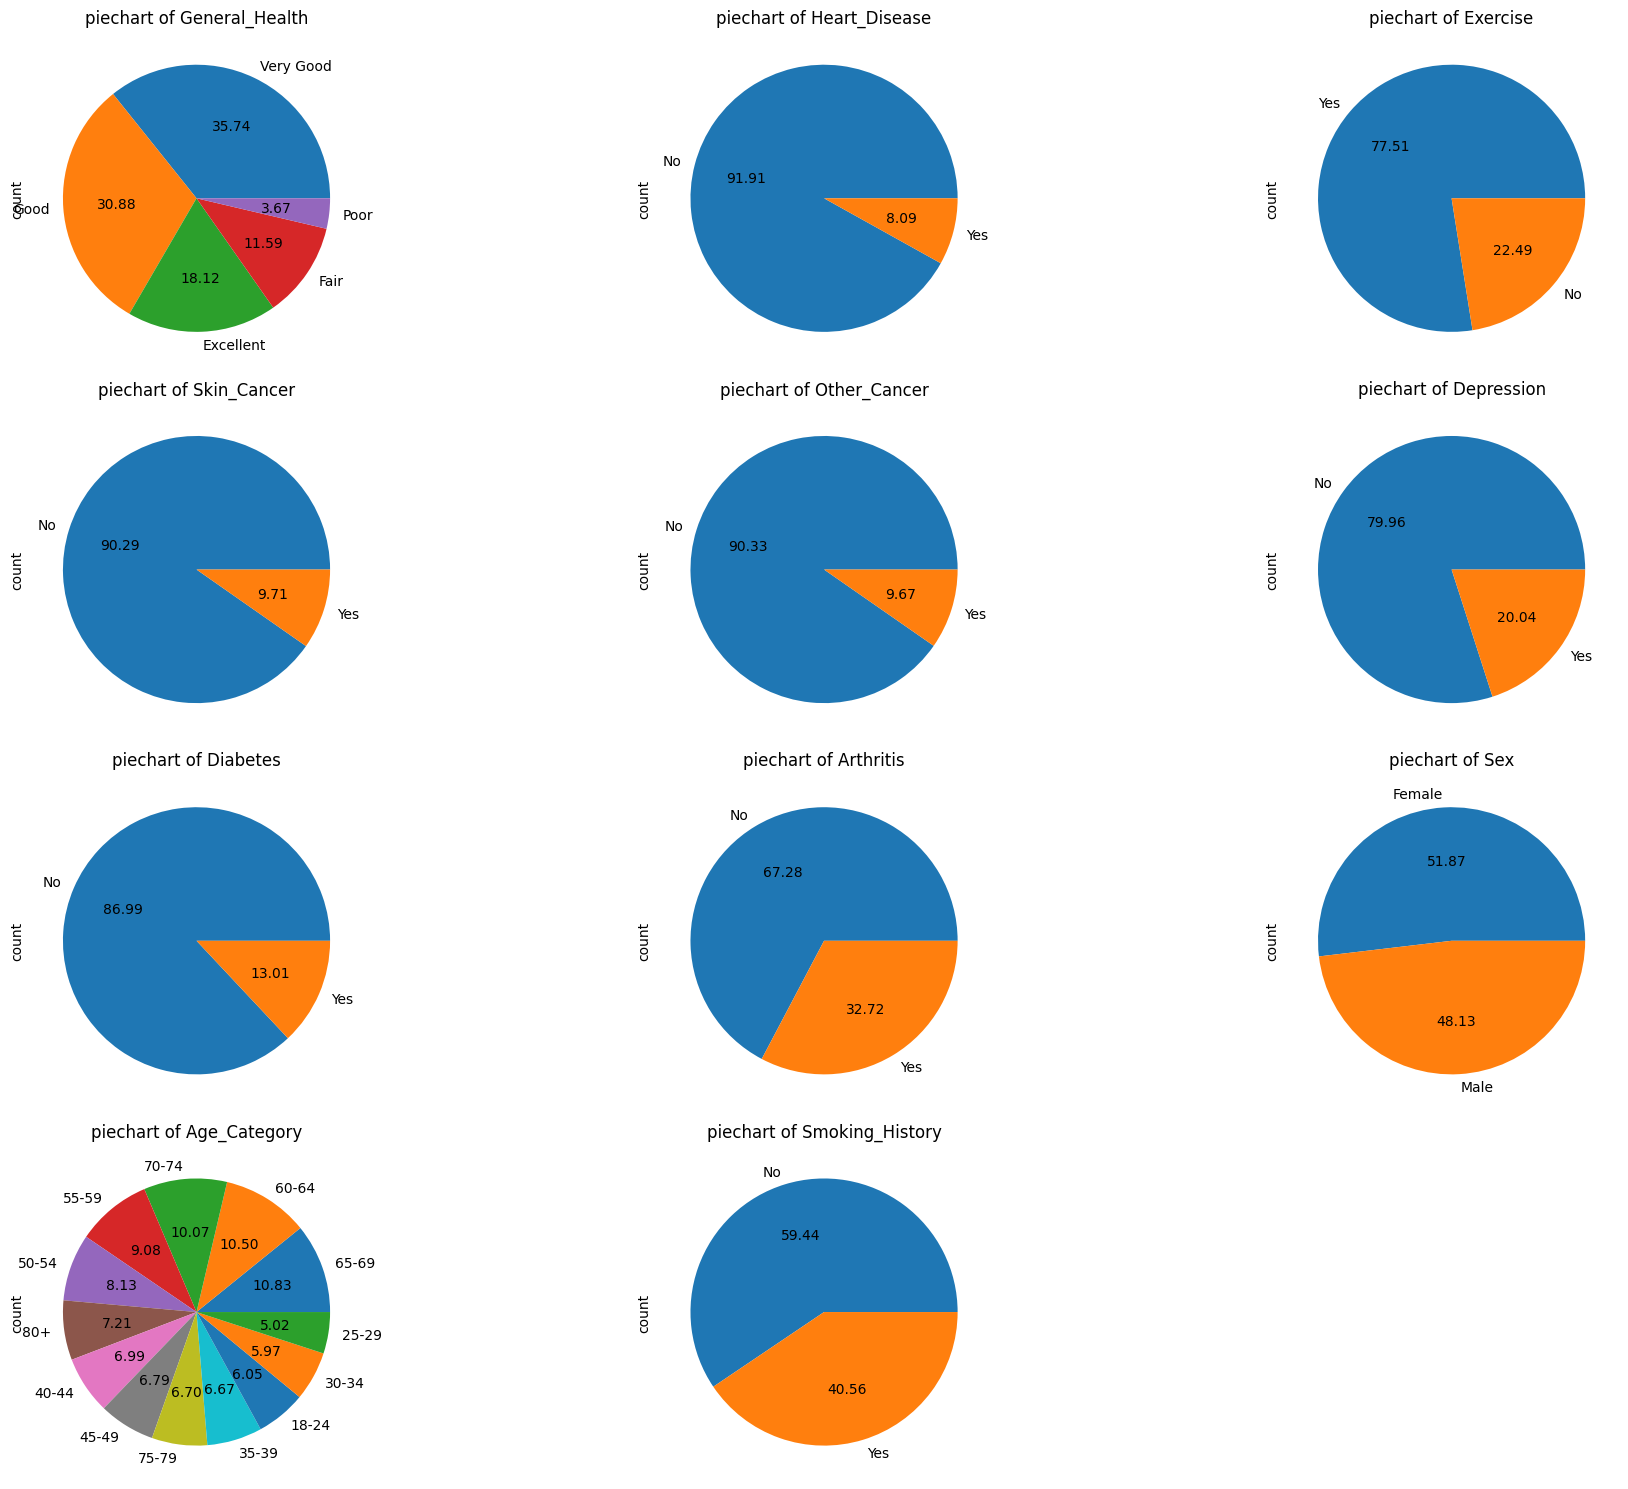

In [19]:
categorical_columns=['General_Health','Heart_Disease','Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']
rows=4
cols=3
plot_index=1
plt.figure(figsize=(20,15))
for col in categorical_columns:
    plt.subplot(rows,cols,plot_index)
    df[col].value_counts().plot(kind='pie',autopct='%.2f')
    plt.title(f'piechart of {col}')
    plot_index+=1
   

plt.tight_layout()
plt.show()

    

    

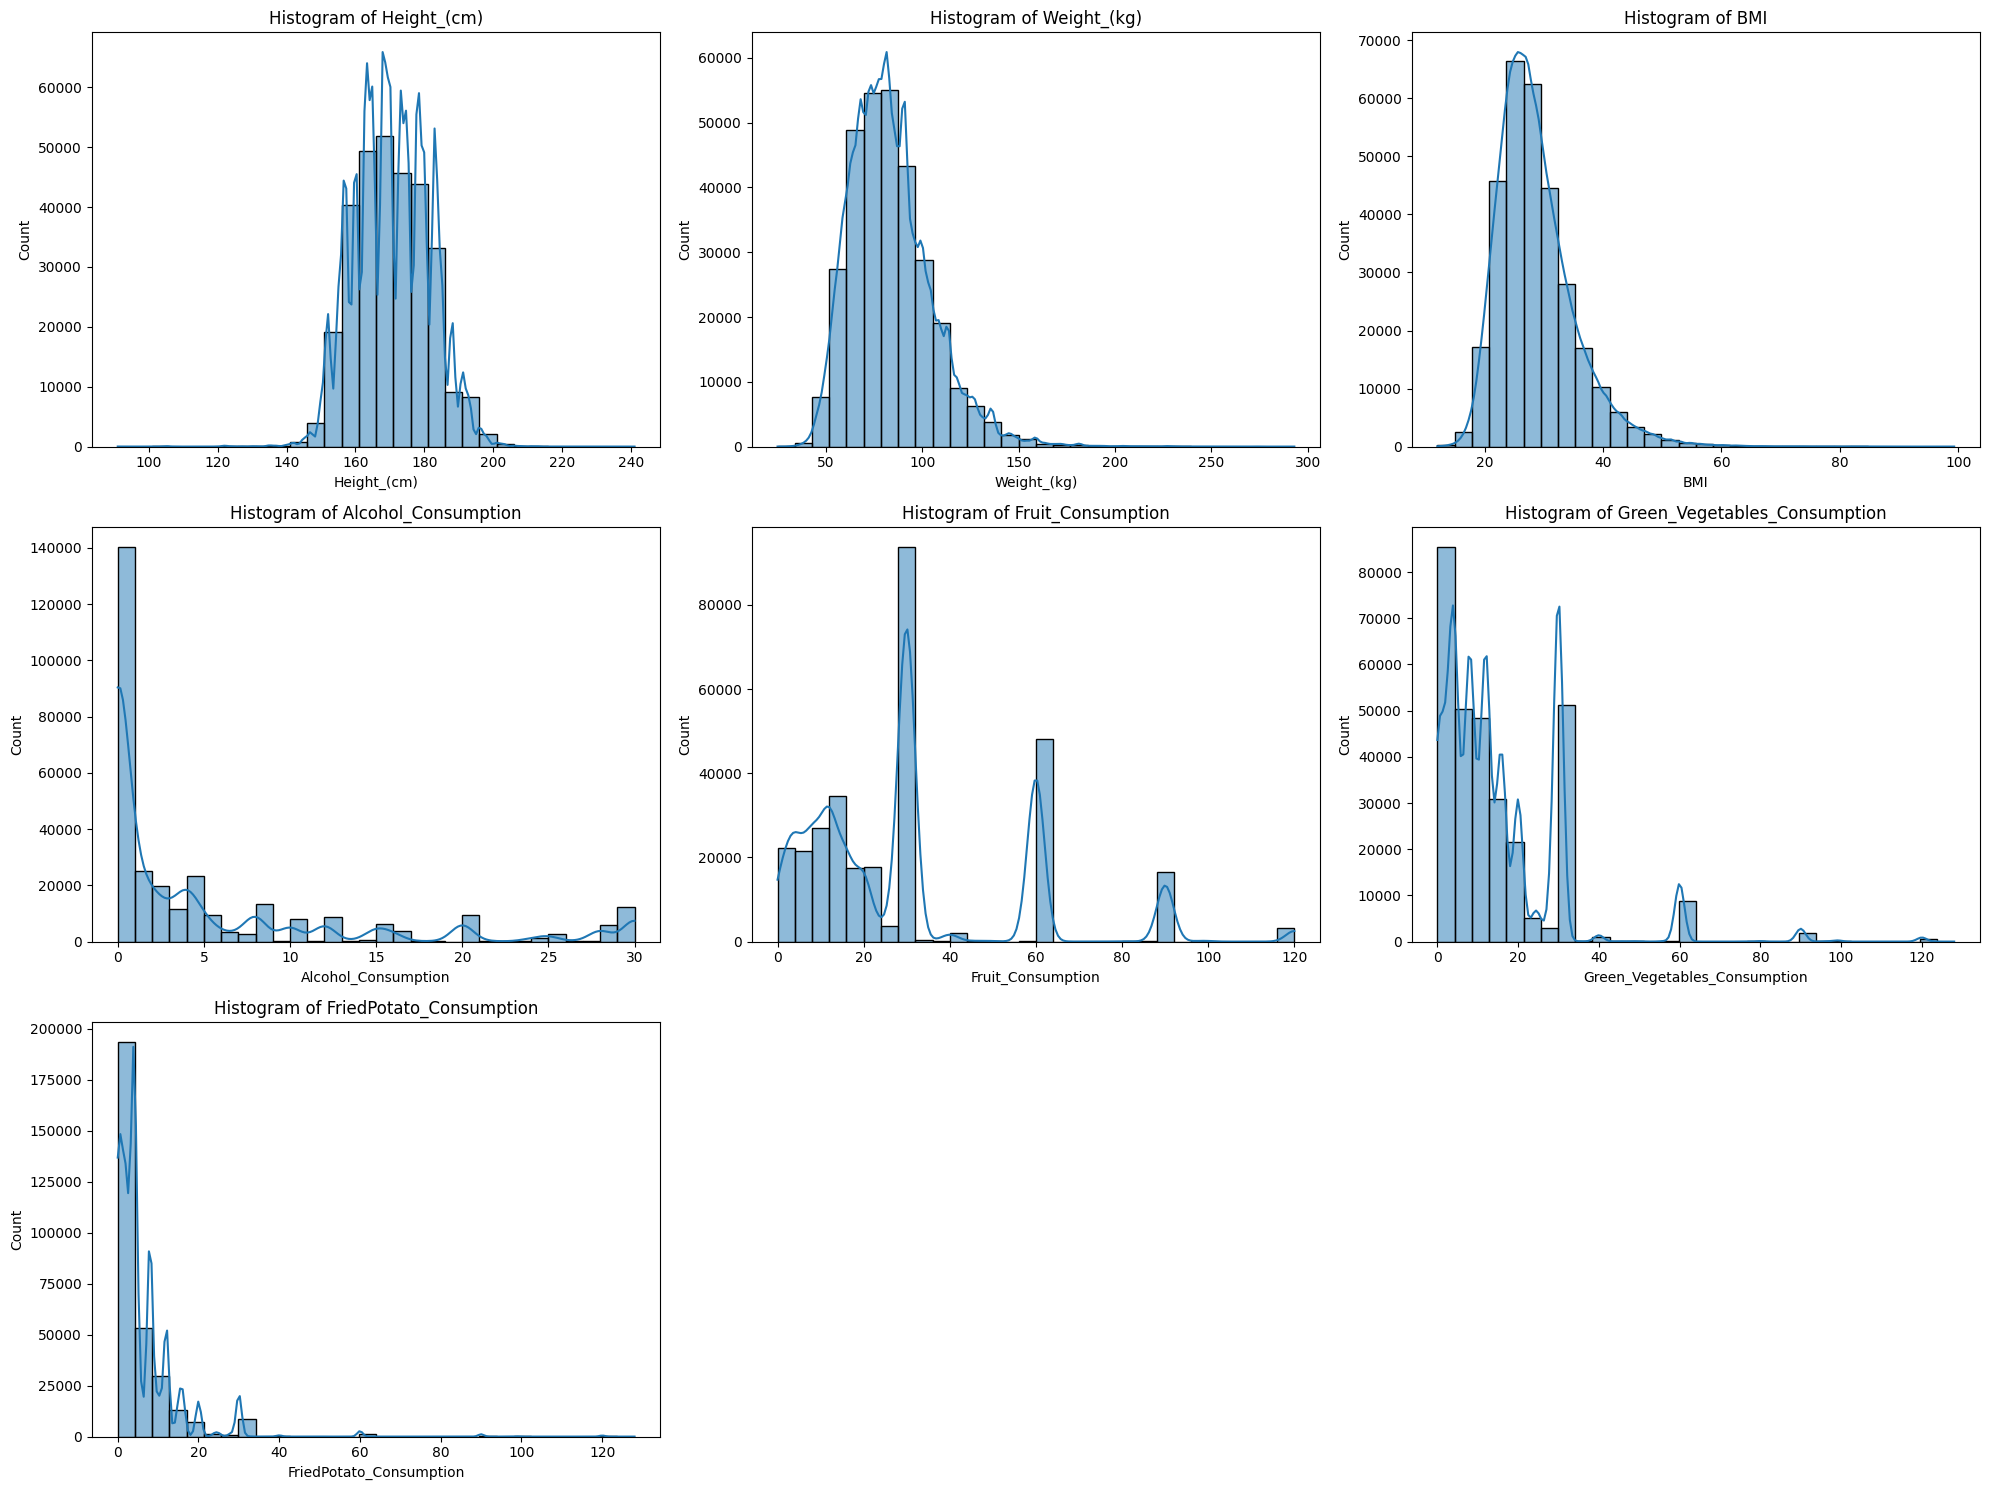

In [20]:
numerical_columns=['Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
rows=3
cols=3
plot_index=1
plt.figure(figsize=(20,15))
for col in numerical_columns:
    plt.subplot(rows, cols, plot_index) 
    sns.histplot(df[col], kde=True,bins=30)  
    plt.title(f'Histogram of {col}') 
    plot_index += 1  
plt.tight_layout()  
plt.show() 

In [21]:
df[numerical_columns].skew()

Height_(cm)                     0.015311
Weight_(kg)                     1.058204
BMI                             1.376619
Alcohol_Consumption             1.885622
Fruit_Consumption               1.248428
Green_Vegetables_Consumption    2.415608
FriedPotato_Consumption         4.912350
dtype: float64

In [22]:
#Histogram of the numerical columns reveals that:-
#1.Height_(cm)  has almost the normal distribution 
#2.Remaining Columns are right skewed from which 'FriedPotato_Consumption' and 'Green_Vegetables_Consumption' are having higher skewness than others

In [23]:
#Treating Skewness

In [24]:
numerical_columns=['Green_Vegetables_Consumption','FriedPotato_Consumption']
for col in numerical_columns:
    df[col]=np.cbrt(df[col])
    

In [25]:
df[numerical_columns].skew()

Green_Vegetables_Consumption   -0.507872
FriedPotato_Consumption        -0.220551
dtype: float64

In [26]:
numerical_columns=['Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
for col in numerical_columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=df[(df[col]<lower_bound)|(df[col]>upper_bound)]
    print(f'Outliers in {col}={len(outliers)}')

Outliers in Height_(cm)=1055
Outliers in Weight_(kg)=7326
Outliers in BMI=9530
Outliers in Alcohol_Consumption=36147
Outliers in Fruit_Consumption=68225
Outliers in Green_Vegetables_Consumption=2795
Outliers in FriedPotato_Consumption=46463


Identfiying the Outliers

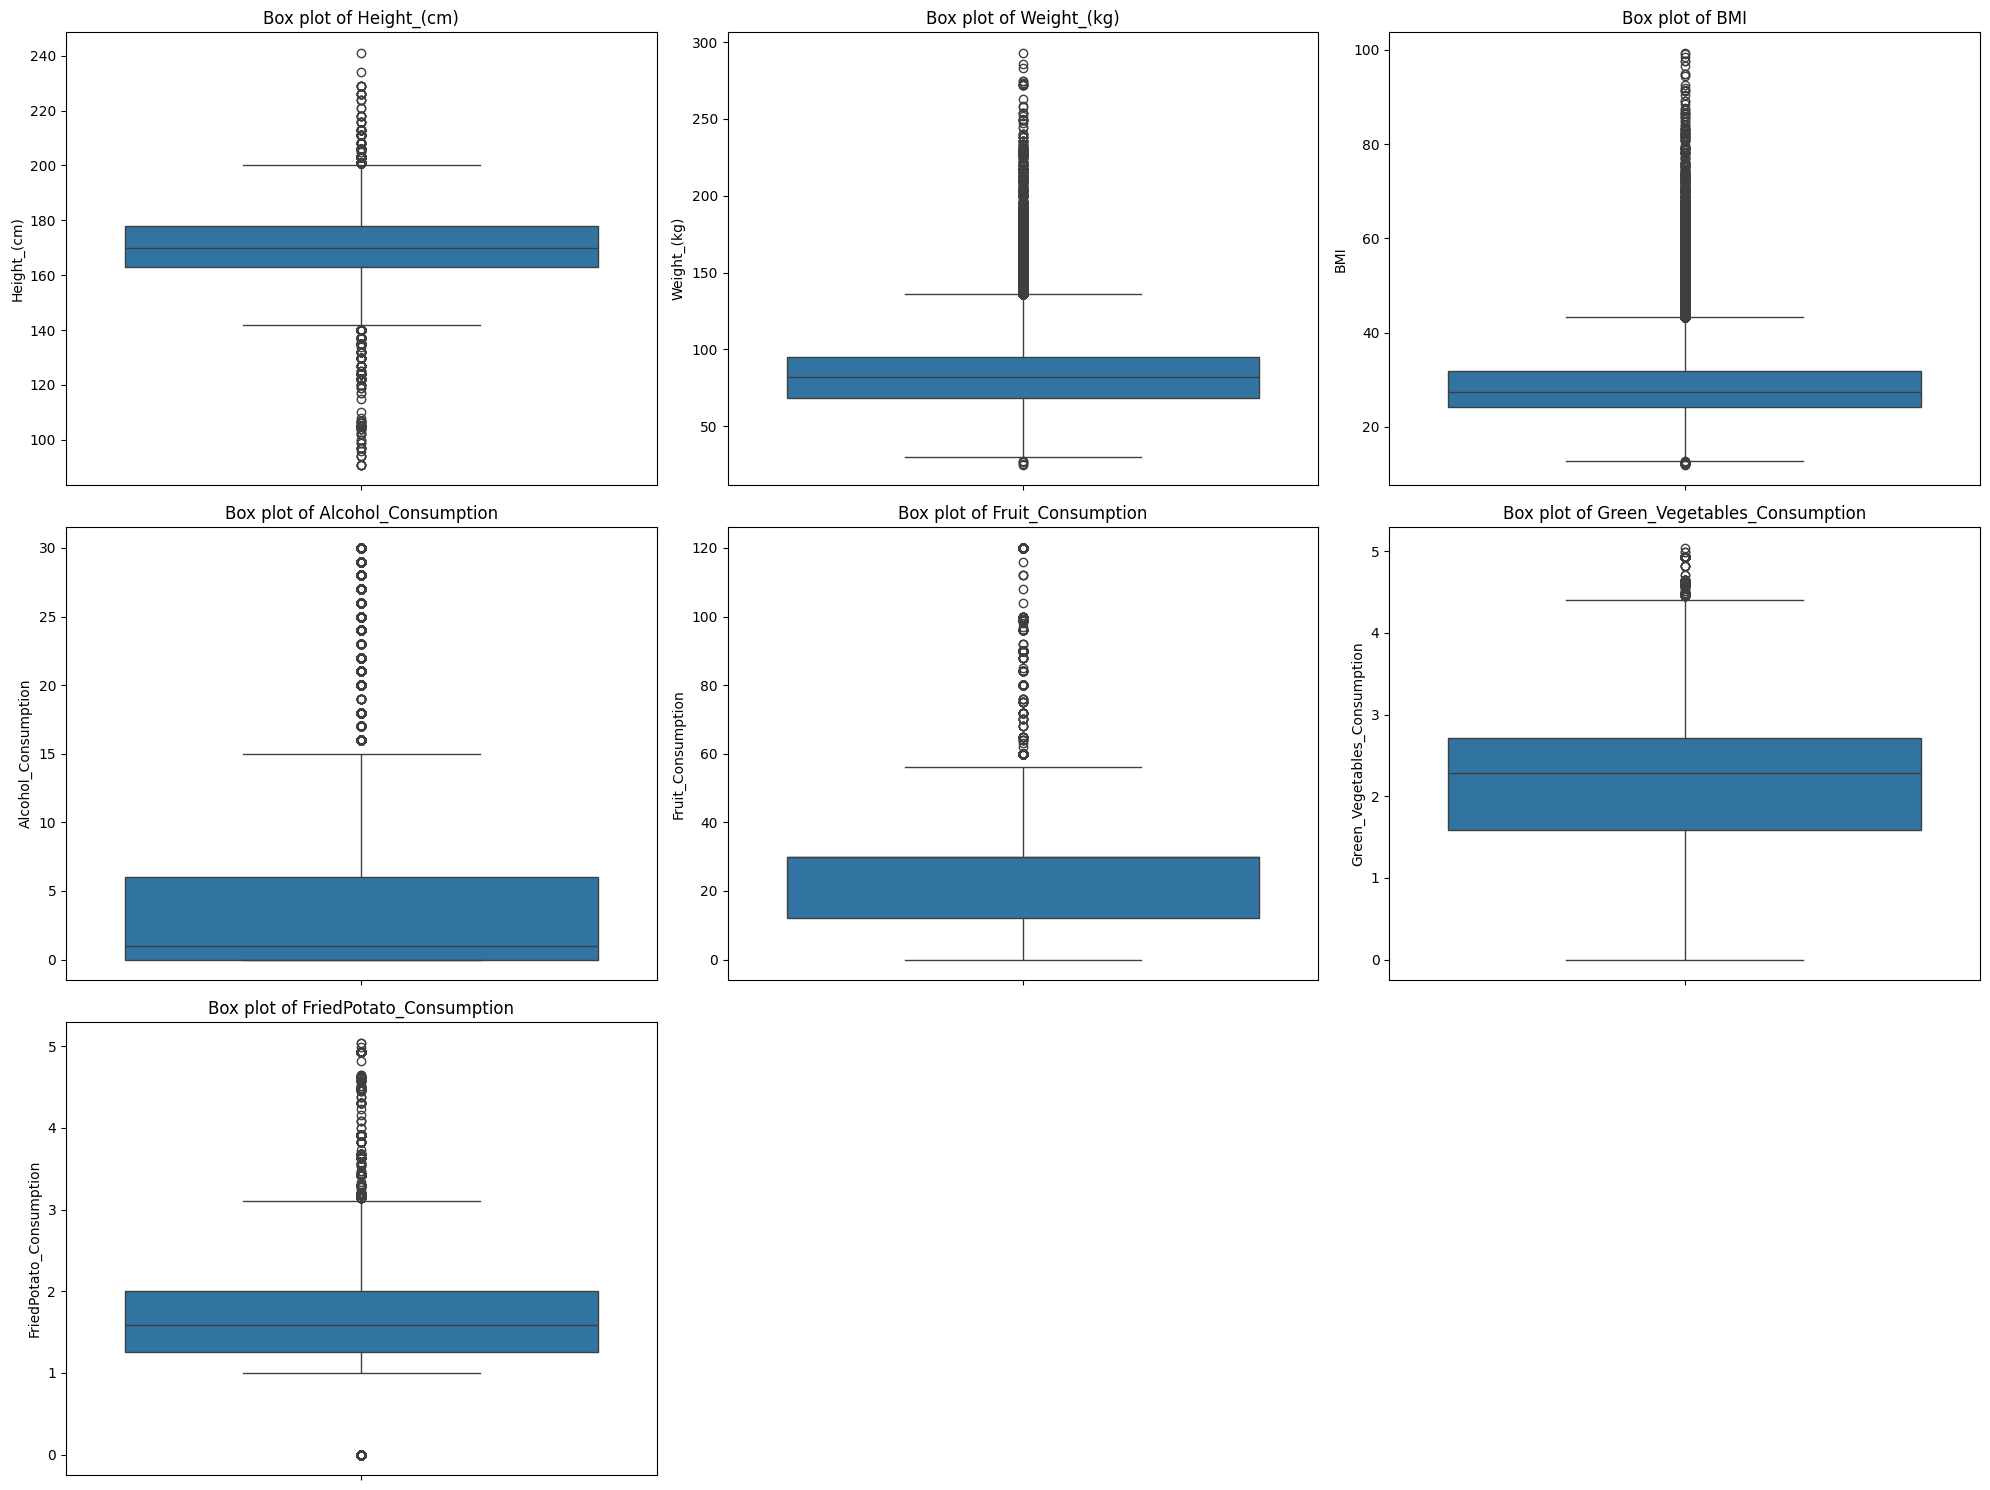

In [27]:
numerical_columns=['Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
rows=3
cols=3
plot_index=1
plt.figure(figsize=(20,15))
for col in numerical_columns:
    plt.subplot(rows,cols,plot_index)
    sns.boxplot(df[col])
    plt.title(f"Box plot of {col}")
    plot_index+=1
plt.tight_layout()
plt.show()
    

<function matplotlib.pyplot.show(close=None, block=None)>

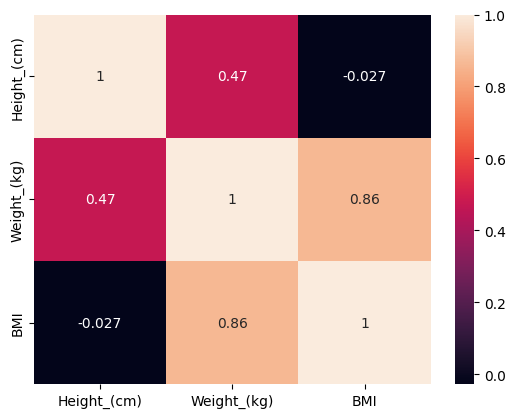

In [28]:
 sns.heatmap(df[['Height_(cm)','Weight_(kg)','BMI']].corr(),annot=True)
 plt.show

In [29]:
 label_enc=LabelEncoder()

In [30]:
 df['Heart_Disease']=label_enc.fit_transform(df['Heart_Disease'])

<function matplotlib.pyplot.show(close=None, block=None)>

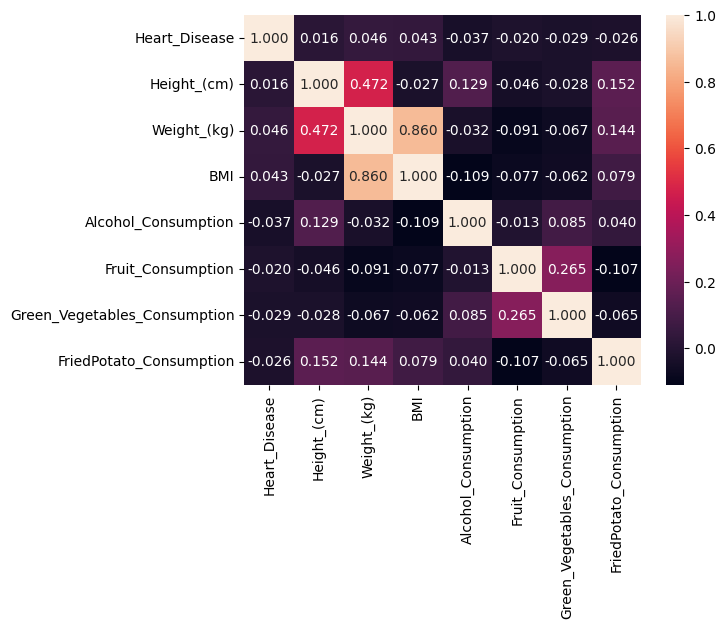

In [31]:
 outliers_columns=['Heart_Disease','Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
 sns.heatmap(df[outliers_columns].corr(),annot=True,fmt='.3f')

plt.show

In [32]:
 df[outliers_columns].corr()

,Heart_Disease,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Heart_Disease,1.000000,0.015780,0.045875,0.042666,-0.036569,-0.020055,-0.029004,-0.026069
Height_(cm),0.015780,1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.027628,0.152300
Weight_(kg),0.045875,0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.067101,0.144447
BMI,0.042666,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.062379,0.079219
Alcohol_Consumption,-0.036569,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.084885,0.039868
Fruit_Consumption,-0.020055,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.264812,-0.106641
Green_Vegetables_Consumption,-0.029004,-0.027628,-0.067101,-0.062379,0.084885,0.264812,1.000000,-0.064909
FriedPotato_Consumption,-0.026069,0.152300,0.144447,0.079219,0.039868,-0.106641,-0.064909,1.000000


In [33]:
df.drop(['BMI'],axis=1,inplace=True)

In [34]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [35]:
#We dropped BMI as heatmap reveal that BMI and Weight are highly correlated and BMI has less correlation with the target variable

Treating Outliers

1.Height_(cm)

In [36]:
q1=df['Height_(cm)'].quantile(0.25)
q3=df['Height_(cm)'].quantile(0.75)

In [37]:
iqr=q3-q1

In [38]:
lower_bound=q1-1.5*iqr

In [39]:
lower_bound

np.float64(140.5)

In [40]:
lower_index=np.where(df['Height_(cm)']<lower_bound)
lower_index

(array([   454,    576,   2246,   2376,   2484,   2930,   4032,   4851,
          4970,   5967,   9517,  11131,  15753,  16315,  16785,  16880,
         17643,  17816,  17911,  18105,  18996,  19080,  19175,  20691,
         20808,  20858,  21128,  21144,  21216,  21244,  21331,  21368,
         21516,  21556,  21557,  21871,  21955,  22009,  22189,  22196,
         22357,  22766,  22822,  23371,  23428,  23489,  23539,  23661,
         23820,  23836,  24141,  24148,  25369,  27158,  28472,  29060,
         29353,  29696,  29699,  30023,  31636,  32004,  33506,  33692,
         34698,  35670,  35950,  36426,  36433,  38719,  39464,  40767,
         41285,  42217,  42896,  43187,  43984,  44035,  44166,  44609,
         44616,  44751,  44797,  45065,  45259,  45467,  45859,  45882,
         45945,  46477,  46806,  46856,  47338,  47399,  47974,  48306,
         48435,  49047,  49186,  52180,  53075,  53601,  53676,  53858,
         54087,  57817,  59874,  60240,  61048,  61374,  61509, 

In [41]:
df.drop(df.index[lower_index],inplace=True)

In [42]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308396,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
308397,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
308398,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
308399,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [43]:
upper_bound=q3+1.5*iqr

In [44]:
upper_index=np.where(df['Height_(cm)']>upper_bound)
upper_index

(array([   181,   1732,   1762,   1979,   2288,   2511,   3645,   3732,
          3788,   3904,   4009,   4276,   4532,   5288,   5371,   6479,
          6745,   7027,   7220,   7763,   7990,   9147,  10336,  10573,
         10931,  11488,  11635,  12444,  13287,  13649,  13806,  14468,
         14608,  15512,  17135,  17227,  17908,  18022,  18471,  18600,
         18978,  19591,  19822,  19885,  19964,  19969,  20152,  20301,
         21165,  21323,  21758,  22336,  23360,  23533,  24882,  24892,
         24967,  25367,  26586,  26646,  27872,  27997,  28567,  31000,
         31280,  31631,  31633,  33256,  33458,  33543,  33893,  33976,
         35298,  35690,  36342,  36539,  36709,  38133,  38243,  38650,
         39052,  39538,  40623,  41423,  42186,  42713,  42867,  44037,
         44552,  44626,  44848,  45725,  47266,  52754,  53673,  53892,
         54299,  54430,  54657,  55127,  55544,  56349,  56477,  56638,
         56874,  57338,  58602,  58620,  59076,  59596,  59683, 

In [45]:
df.drop(df.index[upper_index],inplace=True)

In [46]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307794,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
307795,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
307796,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
307797,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


<Axes: ylabel='Height_(cm)'>

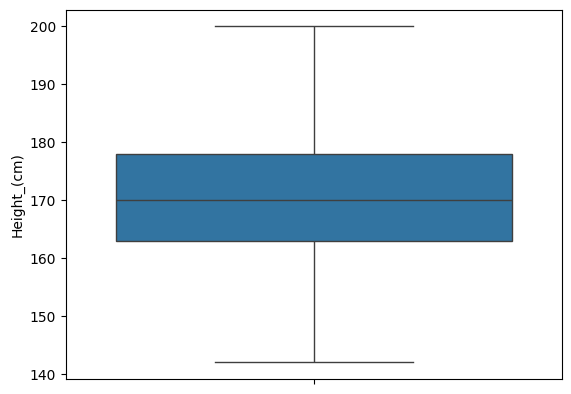

In [47]:
sns.boxplot(df['Height_(cm)'])

2.Weight

In [48]:
q1=df['Weight_(kg)'].quantile(0.25)
q3=df['Weight_(kg)'].quantile(0.75)

In [49]:
iqr=q3-q1
iqr

np.float64(27.209999999999994)

In [50]:
upper_bound=q3+1.5*iqr

In [51]:
upper_index=np.where(df['Weight_(kg)']>upper_bound)
upper_index

(array([     5,     29,    120, ..., 307606, 307625, 307770]),)

In [52]:
df.drop(df.index[upper_index],inplace=True)

In [53]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300590,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
300591,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
300592,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
300593,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [54]:
lower_bound=q1-1.5*iqr

In [55]:
lower_index=np.where(df['Weight_(kg)']<lower_bound)
lower_index

(array([179992]),)

In [56]:
df.drop(df.index[lower_index],inplace=True)

In [57]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300589,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
300590,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
300591,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
300592,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


<Axes: ylabel='Weight_(kg)'>

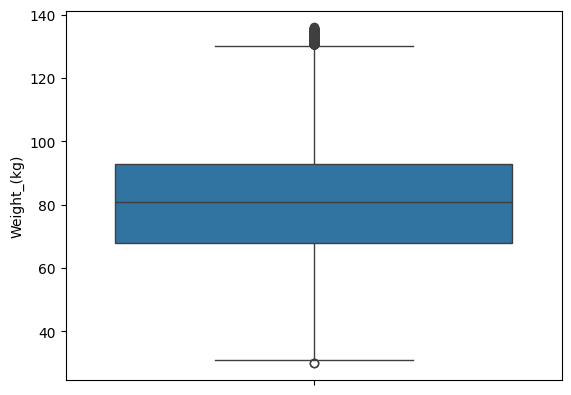

In [58]:
sns.boxplot(df['Weight_(kg)'])

In [59]:
numerical_columns=['Height_(cm)','Weight_(kg)','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
for col in numerical_columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=df[(df[col]<lower_bound)|(df[col]>upper_bound)]
    print(f'Outliers in {col}={len(outliers)}')

Outliers in Height_(cm)=0
Outliers in Weight_(kg)=2131
Outliers in Alcohol_Consumption=35628
Outliers in Fruit_Consumption=66832
Outliers in Green_Vegetables_Consumption=2746
Outliers in FriedPotato_Consumption=45517


3.Alcohol_Consumption

In [60]:
q1=df['Alcohol_Consumption'].quantile(0.25)
q3=df['Alcohol_Consumption'].quantile(0.75)

In [61]:
iqr=q3-q1
iqr

np.float64(6.0)

In [62]:
upper_bound=q3+1.5*iqr

In [63]:
upper_index=np.where(df['Alcohol_Consumption']>upper_bound)
upper_index

(array([    16,     50,     66, ..., 300537, 300556, 300582]),)

In [64]:
df.drop(df.index[upper_index],inplace=True)

In [65]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264961,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
264962,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
264963,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
264964,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [66]:
lower_bound=q1-1.5*iqr

In [67]:
lower_index=np.where(df['Alcohol_Consumption']<lower_bound)

In [68]:
lower_index#There are no lower outliers

(array([], dtype=int64),)

4.Fruit_Consumption

In [69]:
q1=df['Fruit_Consumption'].quantile(0.25)
q3=df['Fruit_Consumption'].quantile(0.75)

In [70]:
iqr=q3-q1
iqr

np.float64(18.0)

In [71]:
upper_bound=q3+1.5*iqr

In [72]:
upper_index=np.where(df['Fruit_Consumption']>upper_bound)
upper_index

(array([    18,     28,     33, ..., 264932, 264943, 264945]),)

In [73]:
df.drop(df.index[upper_index],inplace=True)

In [74]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205475,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
205476,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
205477,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
205478,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [75]:
lower_bound=q1-1.5*iqr

In [76]:
lower_index=np.where(df['Fruit_Consumption']<lower_bound)

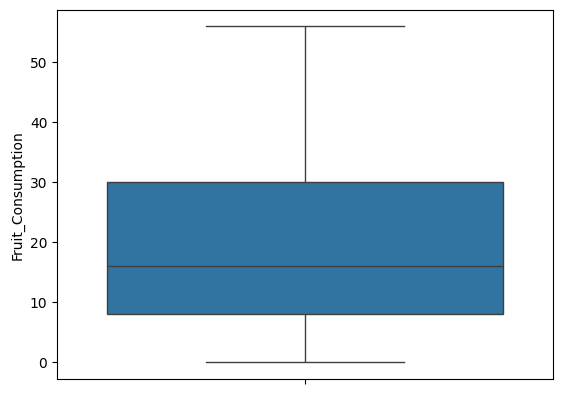

In [77]:
sns.boxplot(df['Fruit_Consumption'])
plt.show()

In [78]:
lower_index#There are no any oultier at lower_index

(array([], dtype=int64),)

5.Greeen_Vegetable_Consumption

In [79]:
q1=df['Green_Vegetables_Consumption'].quantile(0.25)
q3=df['Green_Vegetables_Consumption'].quantile(0.75)

In [80]:
iqr=q3-q1
iqr

np.float64(1.1270165646267074)

In [81]:
upper_bound=q3+1.5*iqr

In [82]:
upper_index=np.where(df['Green_Vegetables_Consumption']>upper_bound)

In [83]:
upper_index

(array([   489,    582,    635, ..., 204771, 205095, 205450]),)

In [84]:
df.drop(df.index[upper_index],inplace=True)

In [85]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204385,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
204386,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
204387,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
204388,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [86]:
lower_bound=q1-1.5*iqr

In [87]:
lower_index=np.where(df['Green_Vegetables_Consumption']<lower_bound)

In [88]:
lower_index#There are no any outliers at lower index

(array([], dtype=int64),)

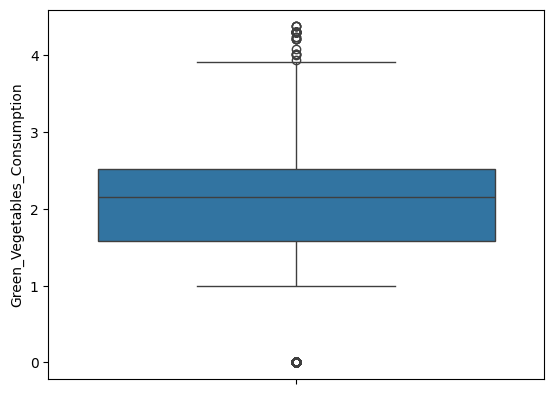

In [89]:
sns.boxplot(df['Green_Vegetables_Consumption'])
plt.show()

6.FriedPotato_Consumption

In [90]:
q1=df['FriedPotato_Consumption'].quantile(0.25)
q3=df['FriedPotato_Consumption'].quantile(0.75)

In [91]:
iqr=q3-q1
iqr

np.float64(0.740078950105127)

In [92]:
upper_bound=q3+1.5*iqr

In [93]:
upper_index=np.where(df['FriedPotato_Consumption']>upper_bound)

In [94]:
upper_index

(array([   555,    643,    696, ..., 200660, 200752, 201468]),)

In [95]:
df.drop(df.index[upper_index],inplace=True)

In [96]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203169,308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
203170,308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
203171,308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
203172,308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [97]:
lower_bound=q1-1.5*iqr

In [98]:
lower_index=np.where(df['FriedPotato_Consumption']<lower_bound)
lower_index

(array([     4,      5,     13, ..., 203168, 203169, 203172]),)

In [99]:
len(lower_index[0])

27187

In [100]:
lower_index_values = lower_index[0] 
values_at_lower_index = df.iloc[lower_index_values] 
print(values_at_lower_index['FriedPotato_Consumption'])


4         0.0
6         0.0
14        0.0
26        0.0
33        0.0
         ... 
308843    0.0
308847    0.0
308848    0.0
308849    0.0
308852    0.0
Name: FriedPotato_Consumption, Length: 27187, dtype: float64


In [101]:
#The values of these outlier are all zero so we have decided to keep these values in our dataset

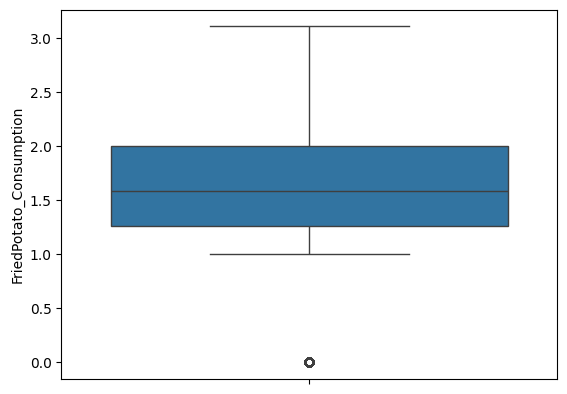

In [102]:
sns.boxplot(df['FriedPotato_Consumption'])
plt.show()

In [103]:
df.to_csv('cleaned.csv',index=False)

<Figure size 1200x600 with 0 Axes>

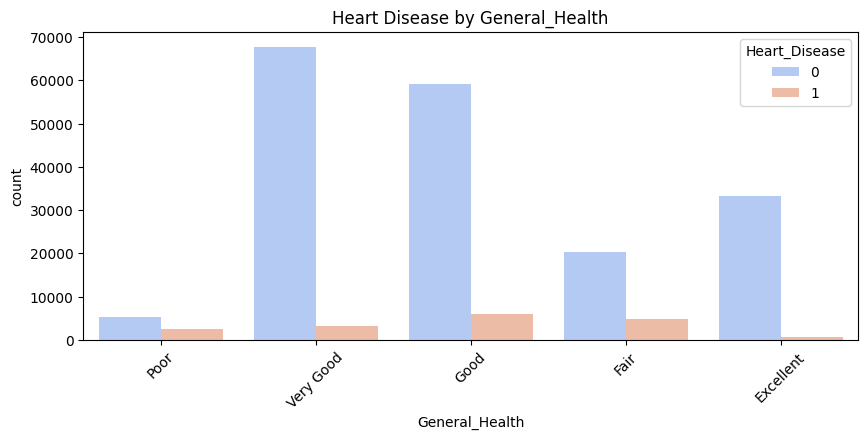

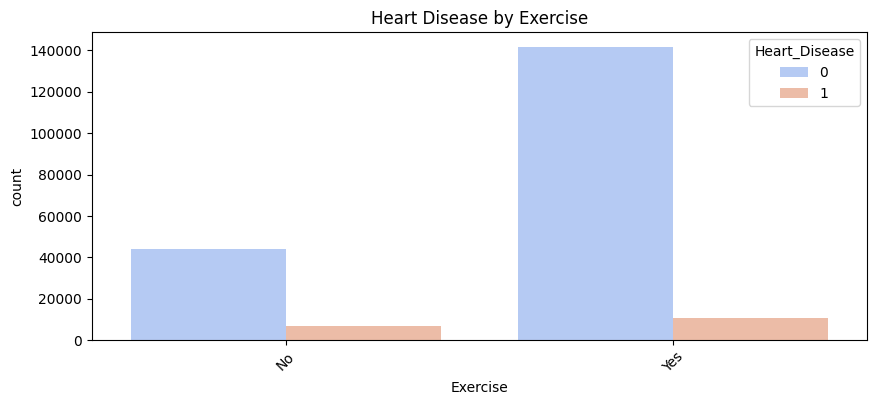

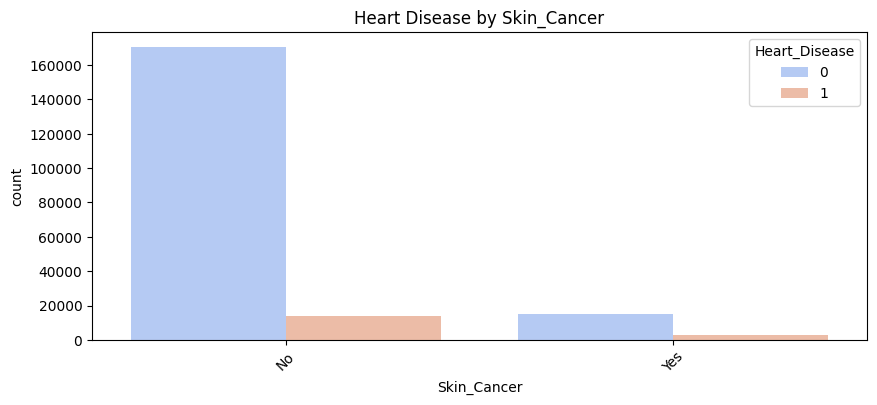

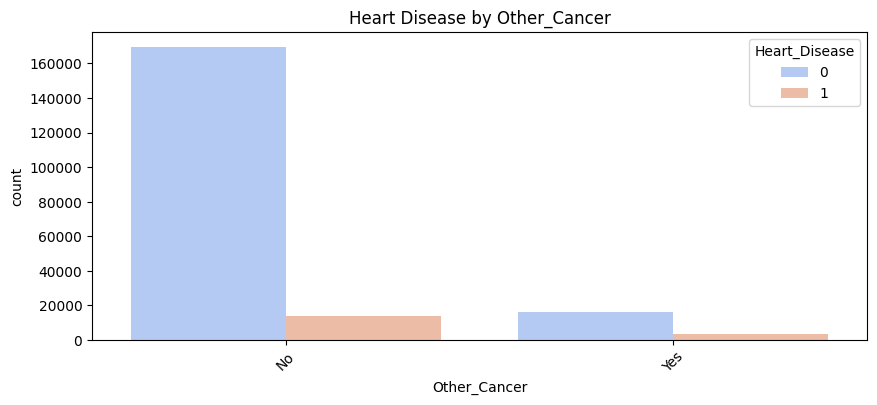

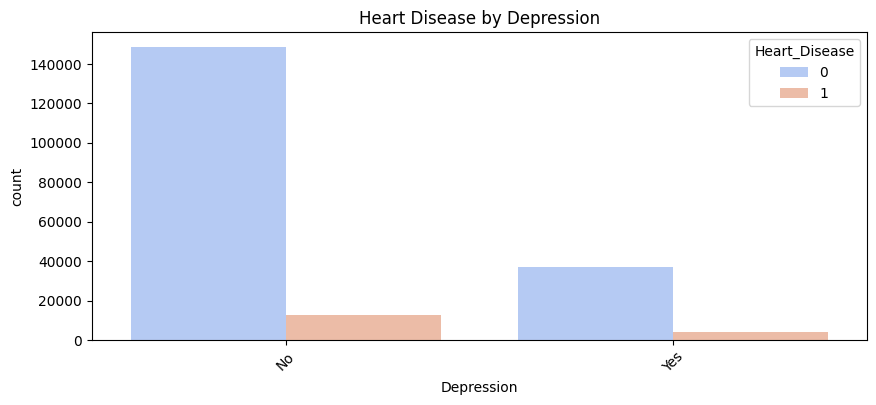

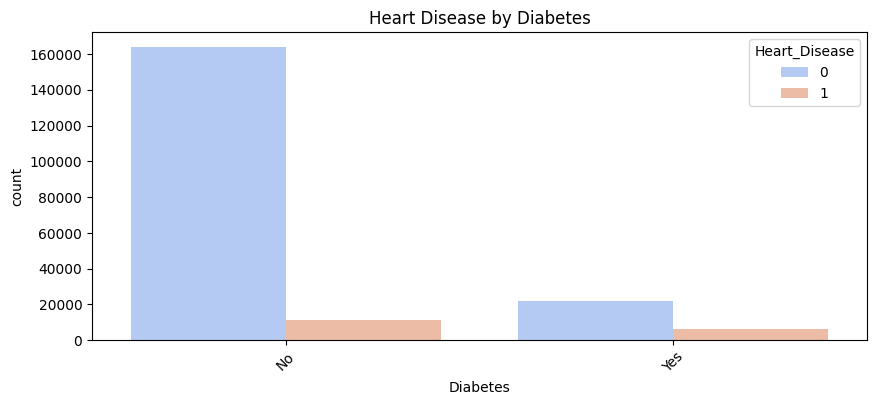

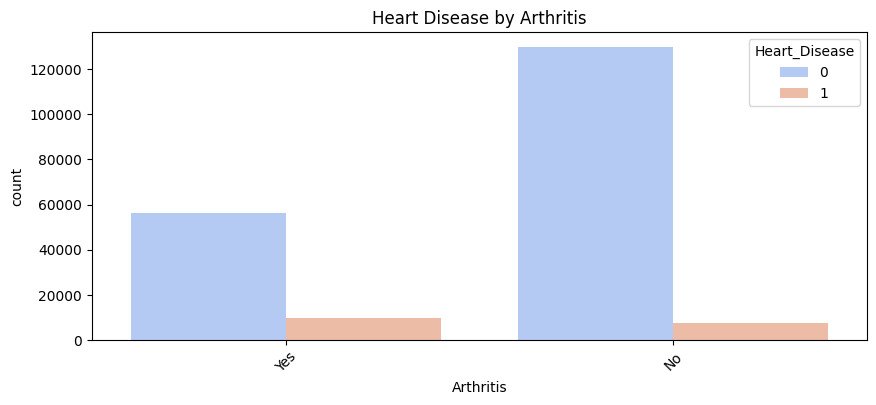

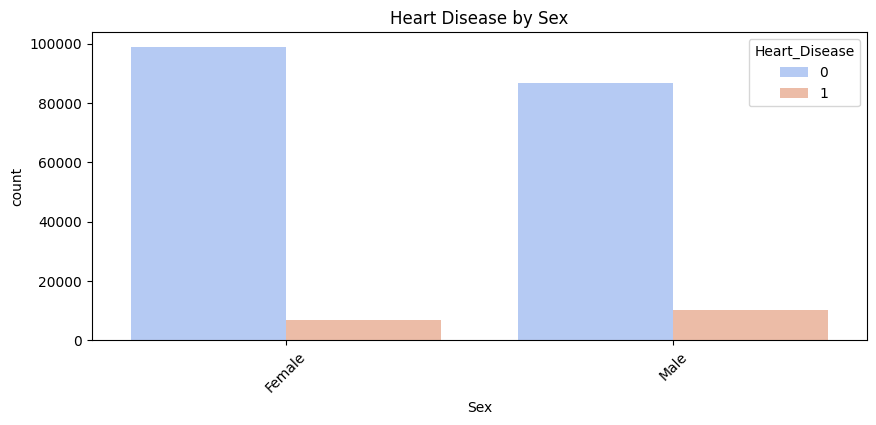

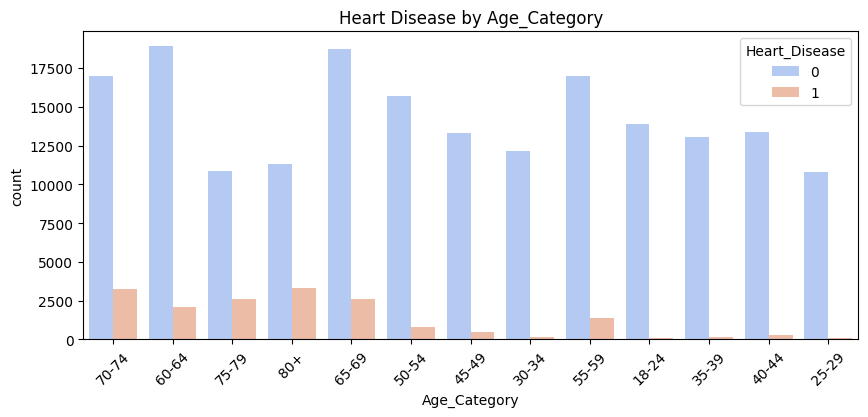

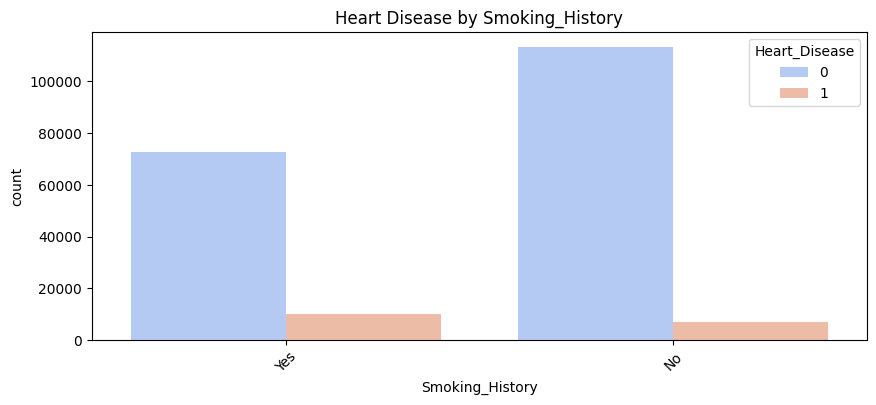

In [104]:


categorical_cols = ['General_Health','Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']
numerical_cols = ['Height_(cm)','Weight_(kg)','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
plt.figure(figsize=(12, 6))
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Heart_Disease', data=df, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f'Heart Disease by {col}')
    plt.show()




<Figure size 1000x400 with 0 Axes>

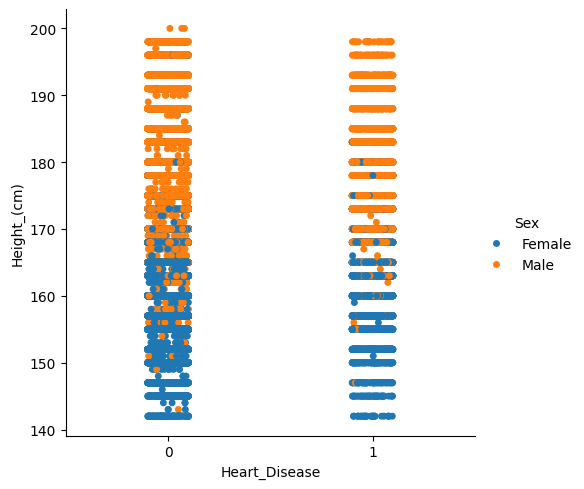

In [105]:
plt.figure(figsize=(10, 4))
sns.catplot(x='Heart_Disease', y='Height_(cm)',hue='Sex' ,data=df)
plt.show()


In [106]:
# The bivariate analysis shows clear differences in distributions for categorical and numerical variables with respect to Heart_Disease. Key observations:

# Some categories (e.g., Poor General Health, Diabetes, Smoking History) show higher heart disease prevalence.

# Higher Weight, Age, and Fried Potato Consumption seem linked to heart disease.

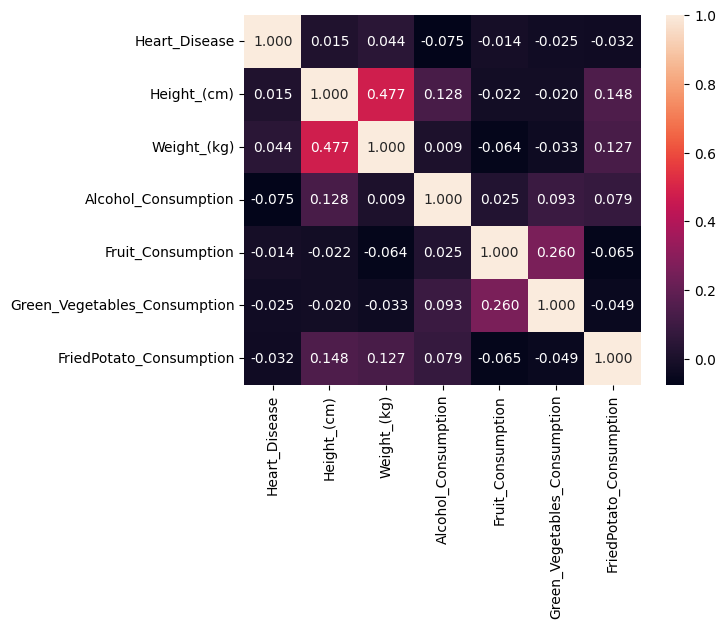

In [107]:
numerical_cols = ['Heart_Disease','Height_(cm)','Weight_(kg)','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.3f')
plt.show()

In [108]:
# Age, Weight, and Diabetes have notable positive correlations with Heart_Disease.

# Exercise and Alcohol Consumption show slight negative correlations, suggesting potential protective effects.

Encoding

In [109]:
#Ordinal Encoding

In [110]:
Ordinal_enc=OrdinalEncoder()

In [111]:
df['General_Health']=Ordinal_enc.fit_transform(df[['General_Health']])

In [112]:
df['Checkup']=Ordinal_enc.fit_transform(df[['Checkup']])

In [113]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3.0,2.0,No,0,No,No,No,No,Yes,Female,70-74,150,32.66,Yes,0,30,2.519842,2.289428
1,4.0,4.0,No,1,No,No,No,Yes,No,Female,70-74,165,77.11,No,0,30,0.000000,1.587401
2,4.0,4.0,Yes,0,No,No,No,Yes,No,Female,60-64,163,88.45,No,4,12,1.442250,2.519842
3,3.0,4.0,Yes,1,No,No,No,Yes,No,Male,75-79,180,93.44,No,0,30,3.107233,2.000000
4,2.0,4.0,No,0,No,No,No,No,No,Male,80+,191,88.45,Yes,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4.0,4.0,Yes,0,No,No,No,No,No,Male,25-29,168,81.65,No,4,30,2.000000,0.000000
308850,1.0,3.0,Yes,0,No,No,No,Yes,No,Male,65-69,180,69.85,No,8,15,3.914868,1.587401
308851,4.0,0.0,Yes,0,No,No,Yes,No,No,Female,30-34,157,61.23,Yes,4,40,2.000000,1.587401
308852,4.0,4.0,Yes,0,No,No,No,No,No,Male,65-69,183,79.38,No,3,30,2.289428,0.000000


In [114]:
#Binary Encoding

In [115]:
Binary_enc=BinaryEncoder()

In [116]:
Binary_encoded=Binary_enc.fit_transform(df[['Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Sex','Arthritis','Smoking_History']])

In [117]:
Binary_encoded

,Exercise_0,Exercise_1,Skin_Cancer_0,Skin_Cancer_1,Other_Cancer_0,Other_Cancer_1,Depression_0,Depression_1,Diabetes_0,Diabetes_1,Sex_0,Sex_1,Arthritis_0,Arthritis_1,Smoking_History_0,Smoking_History_1
0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0
2,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0
3,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
4,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0
308850,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
308851,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1
308852,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0


In [118]:
Binary_encoded.drop(['Exercise_1','Skin_Cancer_1','Other_Cancer_1','Depression_1','Diabetes_1','Sex_1','Arthritis_1','Smoking_History_1',],axis=1,inplace=True)

In [119]:
Binary_encoded

,Exercise_0,Skin_Cancer_0,Other_Cancer_0,Depression_0,Diabetes_0,Sex_0,Arthritis_0,Smoking_History_0
0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,1
2,1,0,0,0,1,0,1,1
3,1,0,0,0,1,1,1,1
4,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
308849,1,0,0,0,0,1,1,1
308850,1,0,0,0,1,1,1,1
308851,1,0,0,1,0,0,1,0
308852,1,0,0,0,0,1,1,1


In [120]:
df.drop(['Exercise','Skin_Cancer','Depression','Diabetes','Sex','Arthritis','Smoking_History','Other_Cancer'],axis=1,inplace=True)

In [121]:
df

,General_Health,Checkup,Heart_Disease,Age_Category,Height_(cm),Weight_(kg),Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3.0,2.0,0,70-74,150,32.66,0,30,2.519842,2.289428
1,4.0,4.0,1,70-74,165,77.11,0,30,0.000000,1.587401
2,4.0,4.0,0,60-64,163,88.45,4,12,1.442250,2.519842
3,3.0,4.0,1,75-79,180,93.44,0,30,3.107233,2.000000
4,2.0,4.0,0,80+,191,88.45,0,8,1.587401,0.000000
...,...,...,...,...,...,...,...,...,...,...
308849,4.0,4.0,0,25-29,168,81.65,4,30,2.000000,0.000000
308850,1.0,3.0,0,65-69,180,69.85,8,15,3.914868,1.587401
308851,4.0,0.0,0,30-34,157,61.23,4,40,2.000000,1.587401
308852,4.0,4.0,0,65-69,183,79.38,3,30,2.289428,0.000000


In [122]:
df_encoded=pd.concat([df,Binary_encoded],axis=1)

In [123]:
df_encoded

,General_Health,Checkup,Heart_Disease,Age_Category,Height_(cm),Weight_(kg),Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_0,Skin_Cancer_0,Other_Cancer_0,Depression_0,Diabetes_0,Sex_0,Arthritis_0,Smoking_History_0
0,3.0,2.0,0,70-74,150,32.66,0,30,2.519842,2.289428,0,0,0,0,0,0,0,0
1,4.0,4.0,1,70-74,165,77.11,0,30,0.000000,1.587401,0,0,0,0,1,0,1,1
2,4.0,4.0,0,60-64,163,88.45,4,12,1.442250,2.519842,1,0,0,0,1,0,1,1
3,3.0,4.0,1,75-79,180,93.44,0,30,3.107233,2.000000,1,0,0,0,1,1,1,1
4,2.0,4.0,0,80+,191,88.45,0,8,1.587401,0.000000,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4.0,4.0,0,25-29,168,81.65,4,30,2.000000,0.000000,1,0,0,0,0,1,1,1
308850,1.0,3.0,0,65-69,180,69.85,8,15,3.914868,1.587401,1,0,0,0,1,1,1,1
308851,4.0,0.0,0,30-34,157,61.23,4,40,2.000000,1.587401,1,0,0,1,0,0,1,0
308852,4.0,4.0,0,65-69,183,79.38,3,30,2.289428,0.000000,1,0,0,0,0,1,1,1


In [124]:
df_encoded['Age_Category']=Ordinal_enc.fit_transform(df_encoded[['Age_Category']])

<Axes: >

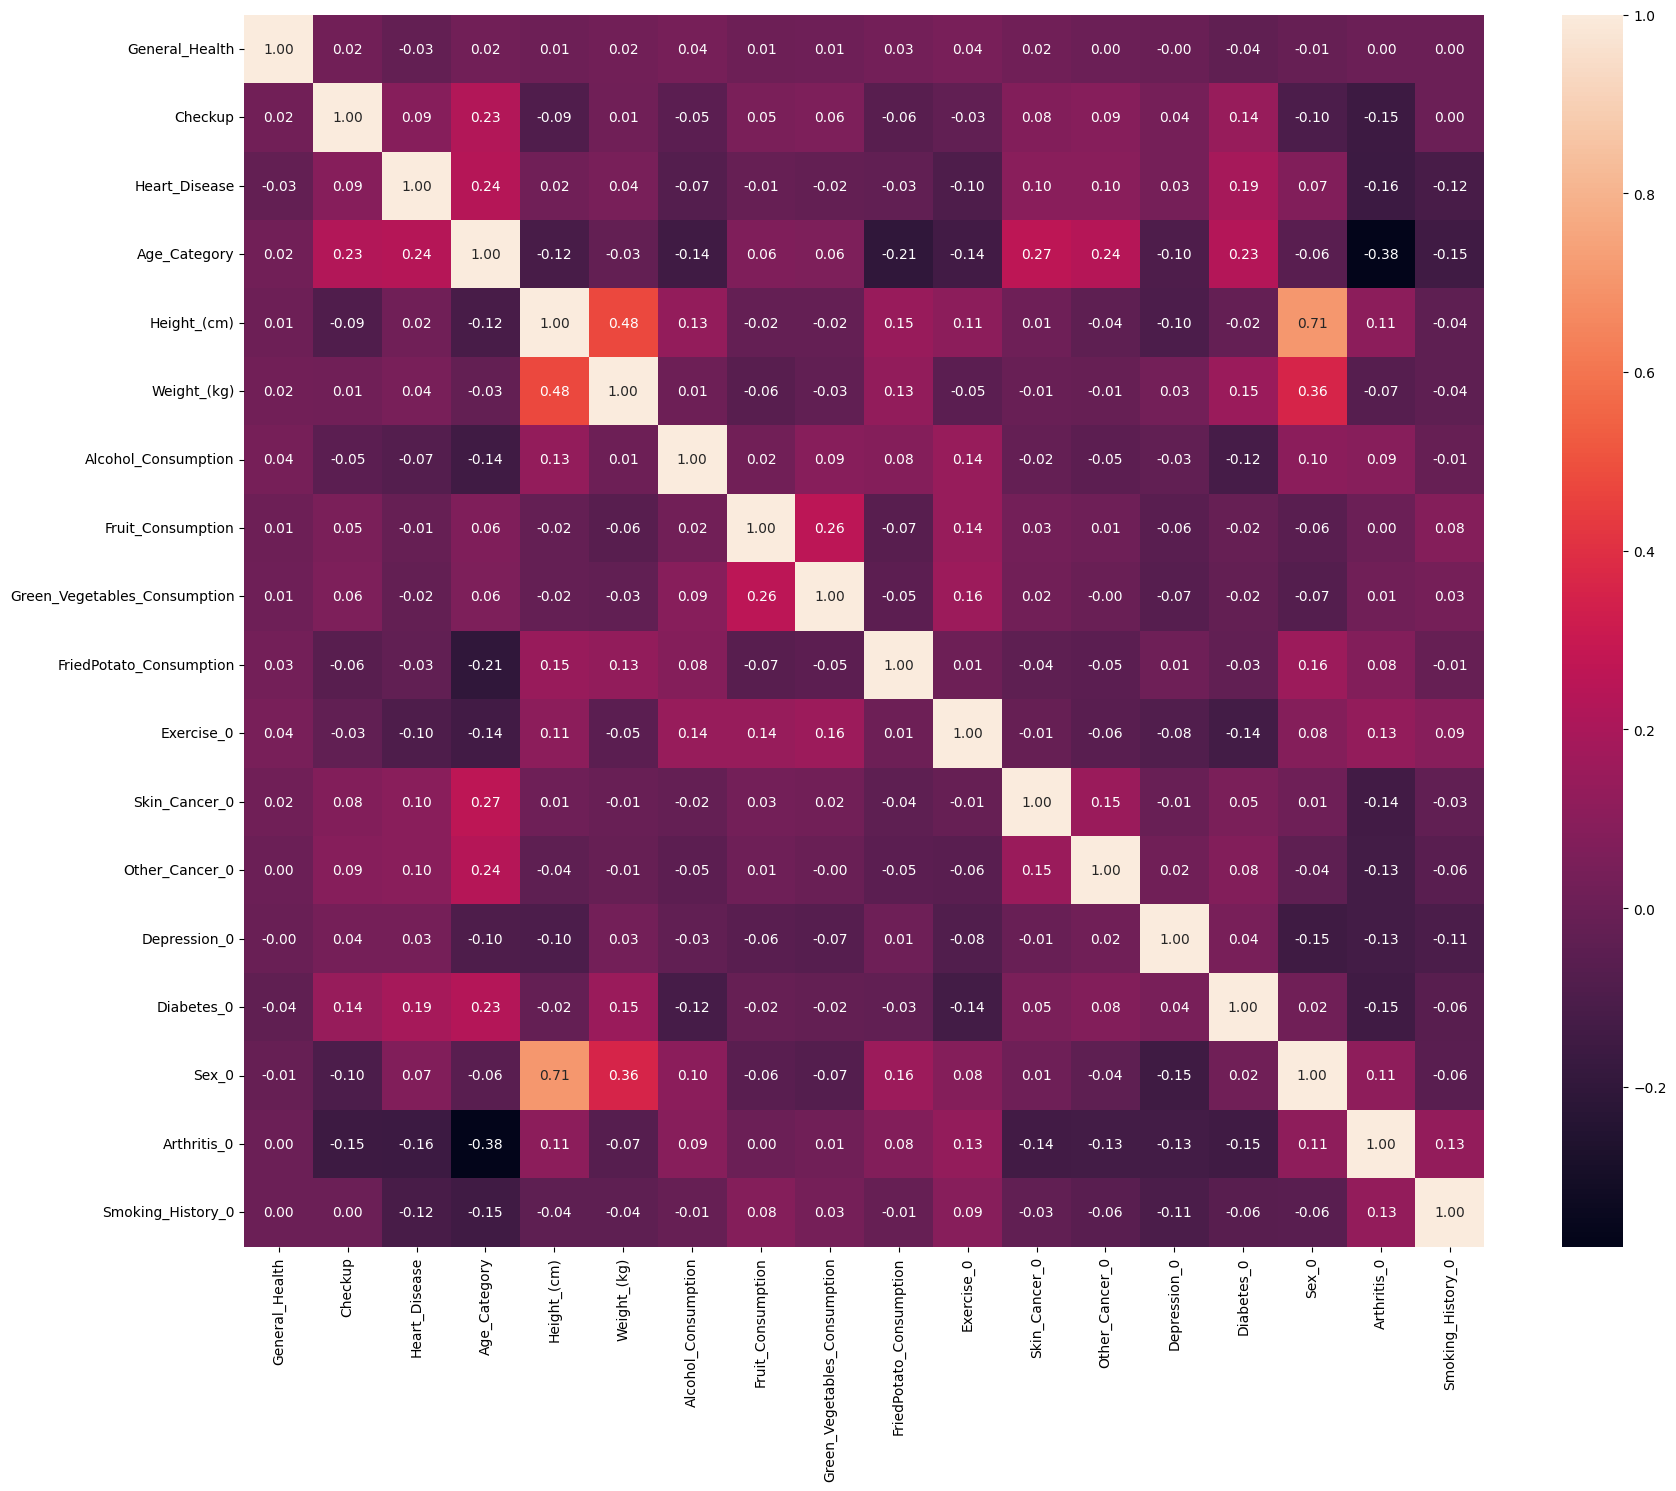

In [125]:
plt.figure(figsize=(20,16))
sns.heatmap(df_encoded.corr(),annot=True,fmt='.2f')

Spliting the the dataset into x and  y as label in y and all the feature in x 

In [126]:
x=df_encoded.drop(['Heart_Disease'],axis=1)

In [127]:
x

,General_Health,Checkup,Age_Category,Height_(cm),Weight_(kg),Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_0,Skin_Cancer_0,Other_Cancer_0,Depression_0,Diabetes_0,Sex_0,Arthritis_0,Smoking_History_0
0,3.0,2.0,10.0,150,32.66,0,30,2.519842,2.289428,0,0,0,0,0,0,0,0
1,4.0,4.0,10.0,165,77.11,0,30,0.000000,1.587401,0,0,0,0,1,0,1,1
2,4.0,4.0,8.0,163,88.45,4,12,1.442250,2.519842,1,0,0,0,1,0,1,1
3,3.0,4.0,11.0,180,93.44,0,30,3.107233,2.000000,1,0,0,0,1,1,1,1
4,2.0,4.0,12.0,191,88.45,0,8,1.587401,0.000000,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4.0,4.0,1.0,168,81.65,4,30,2.000000,0.000000,1,0,0,0,0,1,1,1
308850,1.0,3.0,9.0,180,69.85,8,15,3.914868,1.587401,1,0,0,0,1,1,1,1
308851,4.0,0.0,2.0,157,61.23,4,40,2.000000,1.587401,1,0,0,1,0,0,1,0
308852,4.0,4.0,9.0,183,79.38,3,30,2.289428,0.000000,1,0,0,0,0,1,1,1


In [128]:
y=df_encoded[['Heart_Disease']]

In [129]:
y

,Heart_Disease
0,0
1,1
2,0
3,1
4,0
...,...
308849,0
308850,0
308851,0
308852,0


Perfoming Standard Scaler on the features

In [130]:
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)
x_scaled

array([[ 0.49132128, -1.48142938,  0.99239803, ..., -0.95778434,
        -1.44174449, -1.20578224],
       [ 1.17368061,  0.47657866,  0.99239803, ..., -0.95778434,
         0.69360418,  0.82933714],
       [ 1.17368061,  0.47657866,  0.43280346, ..., -0.95778434,
         0.69360418,  0.82933714],
       ...,
       [ 1.17368061, -3.43943741, -1.24598024, ..., -0.95778434,
         0.69360418, -1.20578224],
       [ 1.17368061,  0.47657866,  0.71260075, ...,  1.04407637,
         0.69360418,  0.82933714],
       [-1.55575669,  0.47657866, -0.40658839, ..., -0.95778434,
         0.69360418,  0.82933714]])

Checking the Variance inflation factor

In [131]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns


In [132]:
vif

,VIF,feature
0,1.008565,General_Health
1,1.086387,Checkup
2,1.511829,Age_Category
3,2.345942,Height_(cm)
4,1.396046,Weight_(kg)
5,1.071432,Alcohol_Consumption
6,1.102431,Fruit_Consumption
7,1.116542,Green_Vegetables_Consumption
8,1.080892,FriedPotato_Consumption
9,1.117382,Exercise_0


Performing Train Test Split

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=50)

Applying Logistic Regression

In [134]:
logistic=LogisticRegression()

In [135]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [136]:
y_predict=logistic.predict(x_test)

In [137]:
logistic_accuracy=accuracy_score(y_test,y_predict)

In [138]:
logistic_accuracy

0.9175099421191479

In [139]:
y_actual=logistic.predict(x_train)

In [140]:
train_accuracy=accuracy_score(y_train,y_actual)

In [141]:
train_accuracy

0.9137878986743667

Applying K Neighbors Classifier

In [142]:
Knn=KNeighborsClassifier()

In [143]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [144]:
y_predicted=Knn.predict(x_test)

In [145]:
test_accuracy=accuracy_score(y_test,y_predict)

In [146]:
test_accuracy

0.9175099421191479

Training

In [172]:
y_predict=Knn.predict(x_train)

In [173]:
train_accuracy=accuracy_score(y_train,y_predict)

In [174]:
train_accuracy

0.9222142013387584

Applying Decision Tree Classifiers

In [150]:
Decision=DecisionTreeClassifier()

In [151]:
Decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [152]:
y_predict=Decision.predict(x_test)

In [153]:
train_accuracy=accuracy_score(y_test,y_predict)

In [154]:
train_accuracy

0.8590778438398236

Training

In [168]:
y_predict=Decision.predict(x_train)

In [169]:
test_accuracy=accuracy_score(y_train,y_predict)

In [170]:
test_accuracy

0.9999737498359365

Applying RandomForest Classifier

In [158]:
Random_Forest=RandomForestClassifier()

In [159]:
Random_Forest.fit(x_train,y_train)

RandomForestClassifier()

In [160]:
y_predict=Random_Forest.predict(x_test)

In [161]:
test_accuracy=accuracy_score(y_test,y_predict)

In [162]:
test_accuracy

0.916604323345277

Training

In [163]:
y_predict=Random_Forest.predict(x_train)

In [164]:
train_accuracy=accuracy_score(y_train,y_predict)

In [165]:
train_accuracy

0.9999606247539047

In [166]:
from sklearn.metrics import classification_report

In [175]:
import joblib

In [176]:
joblib.dump(Random_Forest,'CVD_predictor.pkl')

['CVD_predictor.pkl']

In [177]:
model=joblib.load('CVD_predictor.pkl')

In [178]:
predictions=model.predict(x_test)

In [179]:
print(predictions)

[0 0 0 ... 0 0 0]


In [181]:
pd.DataFrame(predictions)

,0
0,0
1,0
2,0
3,0
4,0
...,...
50789,0
50790,0
50791,0
50792,0
